In [1]:
from posix import chdir
from google.colab import drive
drive.mount('/content/drive/')
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS5990/lottery-tickets' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
chdir(GOOGLE_DRIVE_PATH)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
"""
Plots for ipynb

Likely move to other files after all plots confirmed to work.

Authors: Jordan Bourdeau, Casey Forey
Date Created: 3/8/24
"""
%load_ext tensorboard
import copy
import functools
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from scipy.stats import norm
import tensorflow as tf
import pickle
from src.harness import history

In [3]:
new_sum = history.ExperimentSummary.load_from('testing_experiment/experiment_summary.pkl')
new_sum.experiments.values()

dict_values([<src.harness.history.ExperimentData object at 0x7c0e69b3a020>, <src.harness.history.ExperimentData object at 0x7c0ddcbf05e0>, <src.harness.history.ExperimentData object at 0x7c0dd9a7ddb0>, <src.harness.history.ExperimentData object at 0x7c0dd9b13580>, <src.harness.history.ExperimentData object at 0x7c0dd99c4e50>, <src.harness.history.ExperimentData object at 0x7c0dd9862620>, <src.harness.history.ExperimentData object at 0x7c0dd98efdf0>, <src.harness.history.ExperimentData object at 0x7c0dd97a9600>, <src.harness.history.ExperimentData object at 0x7c0dd963ee00>, <src.harness.history.ExperimentData object at 0x7c0dd96e8610>, <src.harness.history.ExperimentData object at 0x7c0dd958ddb0>, <src.harness.history.ExperimentData object at 0x7c0dd961b5b0>, <src.harness.history.ExperimentData object at 0x7c0dd94ccdc0>, <src.harness.history.ExperimentData object at 0x7c0dd9366590>, <src.harness.history.ExperimentData object at 0x7c0dd93ffd30>, <src.harness.history.ExperimentData object

In [4]:
new_sum.aggregate_across_experiments(new_sum.get_sparcity)

[100.0,
 80.03900828926149,
 64.0561119237838,
 51.2887738644462,
 41.0821049473013,
 32.89674055736845,
 26.362101946663664,
 21.12711451183376,
 16.953227560856682,
 13.600390082892611,
 10.92569671055099,
 8.771613967968193,
 7.068752109823338,
 5.692584674243277,
 4.598852256104422]

In [5]:
new_sum.aggregate_across_experiments(new_sum.accuracy_at_stop)

[0.9789999723434448,
 0.9778000116348267,
 0.9800000190734863,
 0.9790999889373779,
 0.9807999730110168,
 0.9812999963760376,
 0.9825000166893005,
 0.982699990272522,
 0.9832000136375427,
 0.9828000068664551,
 0.9835000038146973,
 0.9839000105857849,
 0.984000027179718,
 0.984000027179718,
 0.9837999939918518]

In [6]:
new_sum.aggregate_across_experiments(new_sum.early_stop)

[730100.0,
 620100.0,
 720100.0,
 620100.0,
 620100.0,
 590100.0,
 620100.0,
 570100.0,
 620100.0,
 630100.0,
 580100.0,
 620100.0,
 610100.0,
 570100.0,
 660100.0]

In [7]:
# possibly make some kind of function that returns a sample of accuracies at certain time steps to pass instead of mean
new_sum.aggregate_across_experiments(new_sum.get_test_accuracy)

[0.962314864268174,
 0.9633793651111542,
 0.9659821921831941,
 0.9659904724075681,
 0.9684857120589604,
 0.9701600025097529,
 0.9723285729922946,
 0.9727896534163376,
 0.974060320664966,
 0.9742437498643994,
 0.9742627143859863,
 0.9756920659352862,
 0.9756370955897916,
 0.9753551719517544,
 0.9750880572333265]

In [8]:
# possibly make some kind of function that returns a sample of accuracies at certain time steps to pass instead of mean
new_sum.aggregate_across_experiments(new_sum.get_positive_ratio_total_final,new_sum.mean_list)

[0.42358876261205514,
 0.42533190247011343,
 0.42468336270852974,
 0.42919409097557415,
 0.4332825096549773,
 0.4355232253209586,
 0.43836435035000854,
 0.44087205070392527,
 0.44263020487632193,
 0.4441257584114726,
 0.44725187957018775,
 0.4444967074317969,
 0.4453995542820758,
 0.452065625617711,
 0.45159448658347606]

In [9]:
# possibly make some kind of function that returns a sample of accuracies at certain time steps to pass instead of mean
new_sum.aggregate_across_experiments(new_sum.get_negative_ratio_total_final)

[0.5764112373879449,
 0.5746680975298866,
 0.5753166372914702,
 0.570805909024426,
 0.5667174903450227,
 0.5644767746790413,
 0.5616356496499915,
 0.5591279492960748,
 0.557369795123678,
 0.5558742415885274,
 0.552748120429812,
 0.5555032925682031,
 0.5546004457179242,
 0.547934374382289,
 0.548405513416524]

In [10]:
new_sum.aggregate_across_experiments(new_sum.get_positive_ratio_total_init)

[0.5003568745304283,
 0.48529287504811625,
 0.47773633153863304,
 0.4722769593659119,
 0.46868999067283595,
 0.4639769781543698,
 0.460546563319275,
 0.458160743808999,
 0.45632573491947453,
 0.4580778790389395,
 0.457267601760176,
 0.4586330935251798,
 0.4588735387885229,
 0.4602493897209211,
 0.4662636824048358]

In [11]:
graph_sum = history.ExperimentSummary.load_from('testing_experiment/experiment_summary.pkl')

In [12]:
def create_graphs(data: history.ExperimentSummary, x_axis: callable, y_axis: callable, confidence = 0.95, num_samples = 26):
  if confidence > 1 or confidence < 0:
    raise ValueError('confidence must be between 0 and 1')
  z_score = norm.ppf((1 + confidence) / 2)
  x_data = data.aggregate_across_experiments(x_axis)
  y_data = data.aggregate_across_experiments(y_axis)
  y_std = data.aggregate_across_experiments(y_axis,np.std)

  y_std = np.array(y_std)
  x_data = ['%.1f' % x for x in x_data ]
  x_labs = range(len(x_data))
  confidence_interval = 1.96 * y_std  / np.sqrt(num_samples)

  plt.plot(y_data)
  plt.xticks(x_labs, x_data, rotation = 45)
  plt.fill_between(range(len(y_data)), y_data - confidence_interval, y_data + confidence_interval, color = 'gray', alpha = 0.3, label = '95% CI')

  plt.show()



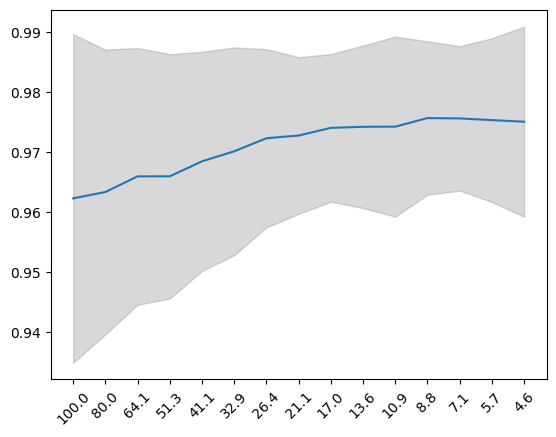

In [13]:
create_graphs(graph_sum, graph_sum.get_sparcity,graph_sum.get_test_accuracy)

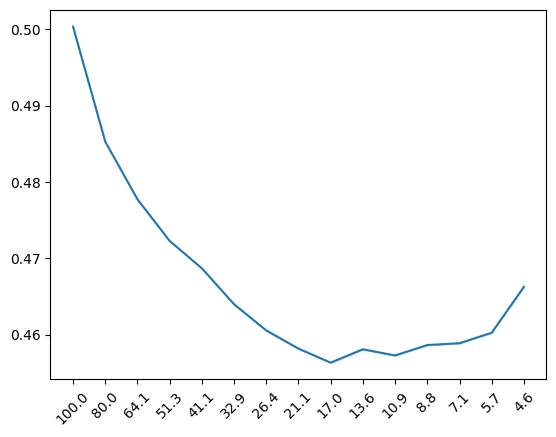

In [14]:
create_graphs(graph_sum, graph_sum.get_sparcity,graph_sum.get_positive_ratio_total_init)

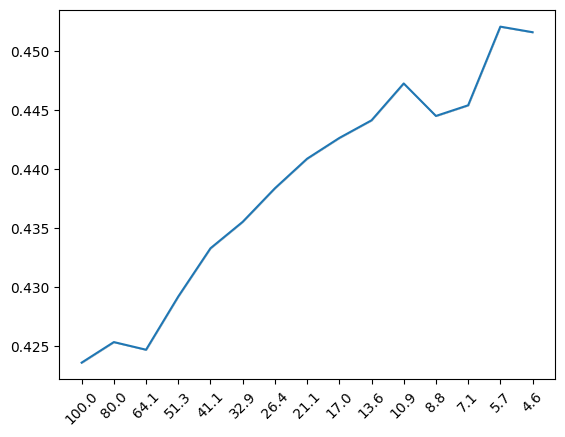

In [16]:
create_graphs(graph_sum, graph_sum.get_sparcity,graph_sum.get_positive_ratio_total_final)